In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import GRU
import tensorflow as tf
import math
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import mean_squared_error

In [264]:
def plot_predictions(test,predicted):
    plt.figure(figsize = (10,6))
    plt.plot(test, color='red',label='Real DSEX Stock Price')
    plt.plot(predicted, color='blue',label='Predicted DSEX Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

In [30]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [146]:
dataset = pd.read_csv('goog2.csv', index_col='Date', parse_dates=['Date']) 
dataset.tail()

,Close,High,Low,Open,Adj Close
Date,,,,,
2019-04-29,1287.579956,1289.270020,1266.295044,1274.000000,1287.579956
2019-04-30,1188.479980,1192.810059,1175.000000,1185.000000,1188.479980
2019-05-01,1168.079956,1188.050049,1167.180054,1188.050049,1168.079956
2019-05-02,1162.609985,1174.189941,1155.001953,1167.760010,1162.609985
2019-05-03,1185.400024,1186.800049,1169.000000,1173.650024,1185.400024


In [147]:
dataset.tail(3)

,Close,High,Low,Open,Adj Close
Date,,,,,
2019-05-01,1168.079956,1188.050049,1167.180054,1188.050049,1168.079956
2019-05-02,1162.609985,1174.189941,1155.001953,1167.760010,1162.609985
2019-05-03,1185.400024,1186.800049,1169.000000,1173.650024,1185.400024


In [212]:
training_set = dataset[:'2017'].iloc[:,0:5]
test_set = dataset['2018':].iloc[:,0:1]

In [213]:
training_set.head(2)

,Close,High,Low,Open,Adj Close
Date,,,,,
2005-05-05,112.75663,113.571327,112.210182,113.571327,112.75663
2005-05-06,113.27327,113.884293,112.503273,113.462036,113.27327


In [214]:
test_set.tail(2)

,Close
Date,
2019-05-02,1162.609985
2019-05-03,1185.400024


In [215]:
len(training_set)

3187

In [216]:
len(test_set)

336

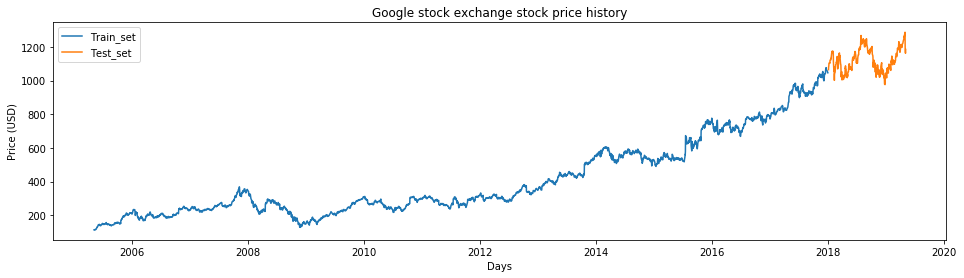

In [217]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))

plt.plot(training_set["Close"])
plt.plot(test_set["Close"])

plt.title('Google stock exchange stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Train_set','Test_set'], loc='upper left')
plt.show()

In [218]:
train= training_set.values.reshape(-1, 1)
test = test_set.values.reshape(-1, 1)

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

In [220]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [221]:
n_cols = X_train.shape[1]

In [222]:
nn_model = Sequential()

nn_model.add(Dense(12, activation='relu', input_shape=(n_cols,))) #Layer1
nn_model.add(Dense(12, activation='sigmoid')) #Layer 2
nn_model.add(Dense(1)) #Output Layer
nn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=4, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
15934/15934 [==============================] - 2s 154us/step - loss: 0.8068 - acc: 0.0000e+00
Epoch 2/100
15934/15934 [==============================] - 1s 37us/step - loss: 0.6631 - acc: 0.0000e+00
Epoch 3/100
15934/15934 [==============================] - 1s 36us/step - loss: 0.3479 - acc: 0.0000e+00
Epoch 4/100
15934/15934 [==============================] - 1s 41us/step - loss: 0.1362 - acc: 0.0000e+00
Epoch 5/100
15934/15934 [==============================] - 1s 34us/step - loss: 0.0681 - acc: 0.0000e+00
Epoch 6/100
15934/15934 [==============================] - 1s 34us/step - loss: 0.0568 - acc: 0.0000e+00
Epoch 7/100
15934/15934 [==============================] - 1s 38us/step - loss: 0.0528 - acc: 0.0000e+00
Epoch 8/100
15934/15934 [==============================] - 1s 42us/step - loss: 0.0484 - acc: 0.0000e+00
Epoch 9/100
15934/15934 [==============================] - 1s 37us/step - loss: 0.0436 - acc: 0.0000e+00
Epoch 10/100
15934/15934 [============================

15934/15934 [==============================] - 1s 34us/step - loss: 9.4104e-04 - acc: 0.0000e+00
Epoch 79/100
15934/15934 [==============================] - 1s 35us/step - loss: 9.3474e-04 - acc: 0.0000e+00
Epoch 80/100
15934/15934 [==============================] - 1s 36us/step - loss: 9.2897e-04 - acc: 0.0000e+00
Epoch 81/100
15934/15934 [==============================] - 1s 44us/step - loss: 9.2452e-04 - acc: 0.0000e+00
Epoch 82/100
15934/15934 [==============================] - 1s 35us/step - loss: 9.2363e-04 - acc: 0.0000e+00
Epoch 83/100
15934/15934 [==============================] - 1s 35us/step - loss: 9.2461e-04 - acc: 0.0000e+00
Epoch 84/100
15934/15934 [==============================] - 1s 44us/step - loss: 9.2648e-04 - acc: 0.0000e+00
Epoch 85/100
15934/15934 [==============================] - 1s 35us/step - loss: 9.2916e-04 - acc: 0.0000e+00
Epoch 86/100
15934/15934 [==============================] - 1s 34us/step - loss: 9.3168e-04 - acc: 0.0000e+00
Epoch 00086: early stop

In [223]:
nn_y_pred_test = nn_model.predict(X_test)

In [224]:
return_rmse(y_test,nn_y_pred_test)

The root mean squared error is 0.2755295397377758.


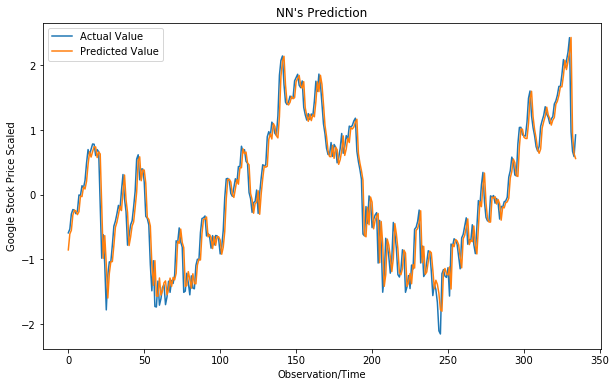

In [227]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Value')
plt.plot(nn_y_pred_test, label='Predicted Value')
plt.title("NN's Prediction")
plt.xlabel('Observation/Time')
plt.ylabel('Google Stock Price Scaled')
plt.legend()
plt.show();

In [209]:
predicted_stock_price = scaler.inverse_transform(nn_y_pred_test)

In [210]:
y_testp = scaler.inverse_transform(y_test)

In [211]:
return_rmse(y_testp,predicted_stock_price)

The root mean squared error is 19.08415603702718.


In [228]:
from statsmodels.tsa.stattools import pacf

In [229]:
dataset_pacf = pacf(dataset, nlags = 5, method = 'ols')

In [230]:
dataset_pacf

array([1.0,
       array([1.00016535, 1.00773737, 0.99181986, 0.99991287, 1.00016535]),
       array([ 5.81860138e-02,  2.65145371e-01, -2.27261777e-01, -1.28103749e-04,
        5.81860138e-02]),
       array([ 0.12716142, -0.18153613,  0.29826482,  0.00821393,  0.12716142]),
       array([-0.21303591, -0.25709012, -0.10919941, -0.13918812, -0.21303591]),
       array([0.35429788, 0.35608232, 0.46276931, 0.4521478 , 0.35429788])],
      dtype=object)

In [239]:
XL_train = []
yL_train = []
for i in range(2,3187+2):
    XL_train.append(train_sc[i-2:i,0])
    yL_train.append(train_sc[i,0])
XL_train, yL_train = np.array(XL_train), np.array(yL_train)

In [240]:
XL_train = np.reshape(XL_train, (XL_train.shape[0],XL_train.shape[1],1))

In [255]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=60, activation = 'tanh' , inner_activation = 'hard_sigmoid',return_sequences=True, input_shape=(XL_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=60))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

/Users/san/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=60, activation="tanh", return_sequences=True, input_shape=(2, 1), recurrent_activation="hard_sigmoid")`
  after removing the cwd from sys.path.


In [256]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
history = regressor.fit(XL_train, yL_train, epochs=100, batch_size=256, verbose=1, callbacks=[early_stop], shuffle=True)




Epoch 1/100
3187/3187 [==============================] - 24s 8ms/step - loss: 0.4391
Epoch 2/100
3187/3187 [==============================] - 2s 488us/step - loss: 0.0144
Epoch 3/100
3187/3187 [==============================] - 2s 695us/step - loss: 0.0142
Epoch 4/100
3187/3187 [==============================] - 2s 661us/step - loss: 0.0141
Epoch 5/100
3187/3187 [==============================] - 2s 609us/step - loss: 0.0136
Epoch 6/100
3187/3187 [==============================] - 2s 514us/step - loss: 0.0097
Epoch 7/100
3187/3187 [==============================] - 2s 500us/step - loss: 0.0123
Epoch 8/100
3187/3187 [==============================] - 2s 503us/step - loss: 0.0103
Epoch 9/100
3187/3187 [==============================] - 2s 596us/step - loss: 0.0105
Epoch 10/100
3187/3187 [==============================] - 2s 685us/step - loss: 0.0109
Epoch 11/100
3187/3187 [==============================] - 2s 728us/step - loss: 0.0107
Epoch 12/100
3187/3187 [=============================

3187/3187 [==============================] - 2s 585us/step - loss: 0.0022
Epoch 96/100
3187/3187 [==============================] - 2s 482us/step - loss: 0.0020
Epoch 97/100
3187/3187 [==============================] - 2s 524us/step - loss: 0.0022
Epoch 98/100
3187/3187 [==============================] - 2s 532us/step - loss: 0.0021
Epoch 99/100
3187/3187 [==============================] - 1s 456us/step - loss: 0.0020
Epoch 100/100
3187/3187 [==============================] - 2s 654us/step - loss: 0.0017


In [251]:
dataset_total = pd.concat((dataset["Close"][:'2018'],dataset["Close"]['2019':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 2:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [252]:
XL_test = []
yL_test = []
for i in range(2,335+2): #lenght of y_test+2
    XL_test.append(inputs[i-2:i,0])
    yL_test.append(inputs[i,0])
XL_test = np.array(XL_test)
XL_test = np.reshape(XL_test, (XL_test.shape[0],XL_test.shape[1],1))


predicted_stock_price = regressor.predict(XL_test)

In [253]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 0.8735664443653334.


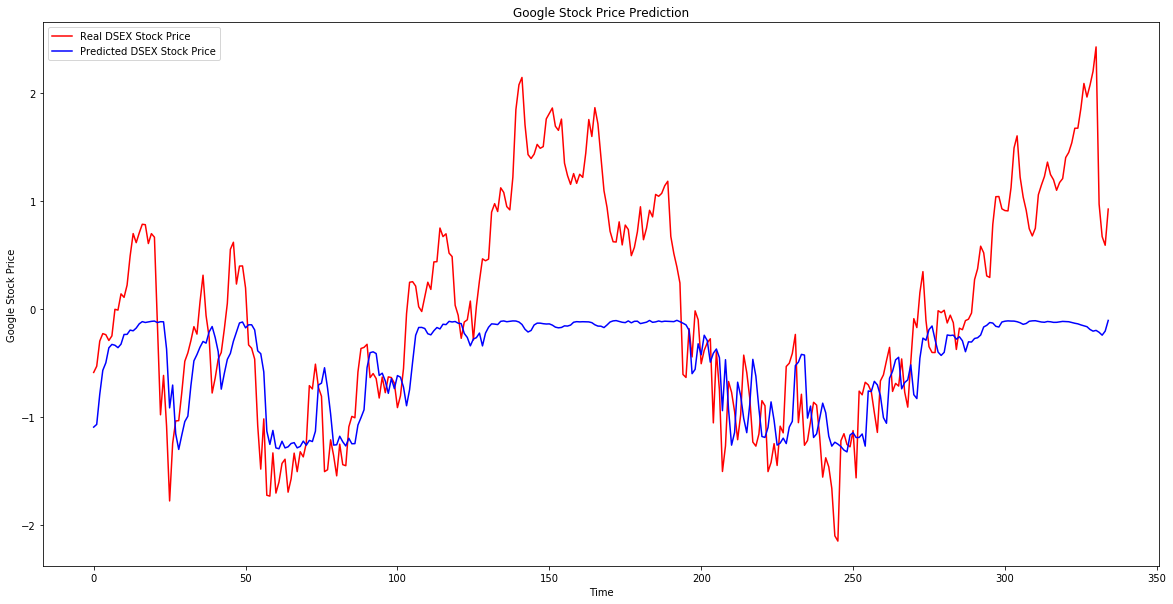

In [254]:
plot_predictions(y_test,predicted_stock_price)

# GRU

In [257]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(GRU(units=60, activation = 'tanh' , inner_activation = 'hard_sigmoid',return_sequences=True, input_shape=(XL_train.shape[1],1)))
# Second LSTM layer
regressor.add(GRU(units=60, return_sequences=True))
# Third LSTM layer
regressor.add(GRU(units=60, return_sequences=True))
# Fourth LSTM layer
regressor.add(GRU(units=60))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

/Users/san/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(units=60, activation="tanh", return_sequences=True, input_shape=(2, 1), recurrent_activation="hard_sigmoid")`
  after removing the cwd from sys.path.


In [259]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history = regressor.fit(XL_train, yL_train, epochs=250, batch_size=256, verbose=1, callbacks=[early_stop], shuffle=True)




Epoch 1/250
3187/3187 [==============================] - 1s 411us/step - loss: 0.0022
Epoch 2/250
3187/3187 [==============================] - 2s 607us/step - loss: 0.0019
Epoch 3/250
3187/3187 [==============================] - 2s 571us/step - loss: 0.0020
Epoch 4/250
3187/3187 [==============================] - 2s 712us/step - loss: 0.0019
Epoch 5/250
3187/3187 [==============================] - 2s 568us/step - loss: 0.0019
Epoch 6/250
3187/3187 [==============================] - 1s 468us/step - loss: 0.0020
Epoch 7/250
3187/3187 [==============================] - 1s 438us/step - loss: 0.0019
Epoch 8/250
3187/3187 [==============================] - 2s 511us/step - loss: 0.0017
Epoch 9/250
3187/3187 [==============================] - 2s 581us/step - loss: 0.0019
Epoch 10/250
3187/3187 [==============================] - 2s 474us/step - loss: 0.0020
Epoch 11/250
3187/3187 [==============================] - 1s 460us/step - loss: 0.0018
Epoch 12/250
3187/3187 [============================

In [260]:
dataset_total = pd.concat((dataset["Close"][:'2018'],dataset["Close"]['2019':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 2:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [261]:
XL_test = []
yL_test = []
for i in range(2,335+2): #lenght of y_test+2
    XL_test.append(inputs[i-2:i,0])
    yL_test.append(inputs[i,0])
XL_test = np.array(XL_test)
XL_test = np.reshape(XL_test, (XL_test.shape[0],XL_test.shape[1],1))


predicted_stock_price = regressor.predict(XL_test)

In [262]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 0.4543938977445383.


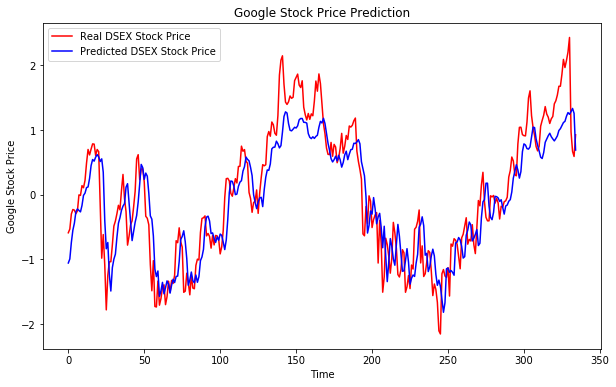

In [265]:
plot_predictions(y_test,predicted_stock_price)